<a href="https://colab.research.google.com/github/CharlesRMcCullough/PyTorch-Udemy/blob/main/PyTorchWorkflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import numpy as np
from torch import nn
import matplotlib.pyplot as plt
from pathlib import Path

ModuleNotFoundError: No module named 'torch'

## PyTorch Workflow

### Let's explore an example of PyTorch end-to-end workflow.

## 1. Data (preparing and  loading)

In [2]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [3]:
len(X), len(y)

(50, 50)

### Splitting data into training and test sets (one of most importent items)

In [4]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [5]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # plot training in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot predictions if they exist
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

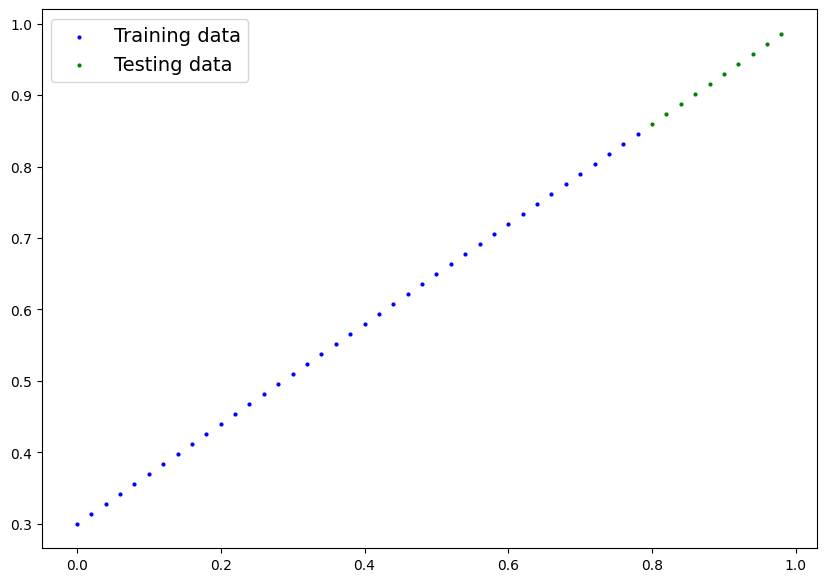

In [6]:
plot_predictions()

## 2. Build model

In [7]:
# Create a linear regression model class

class LinearRegressionMode(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.rand(1,
      requires_grad=True,
      dtype=torch.float))
    self.bias = nn.Parameter(torch.rand(1,
      requires_grad=True,
      dtype=torch.float))

# Forward method to define the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias

In [8]:
# Create a random seed
torch.manual_seed(42)

model_0 = LinearRegressionMode()
model_0.state_dict()

OrderedDict([('weights', tensor([0.8823])), ('bias', tensor([0.9150]))])

### Making prediction using torch.inference_model()

In [9]:
# Make predictions with modal
with torch.inference_mode():
  y_preds = model_0(X_test)
y_preds

tensor([[1.6208],
        [1.6385],
        [1.6561],
        [1.6738],
        [1.6914],
        [1.7090],
        [1.7267],
        [1.7443],
        [1.7620],
        [1.7796]])

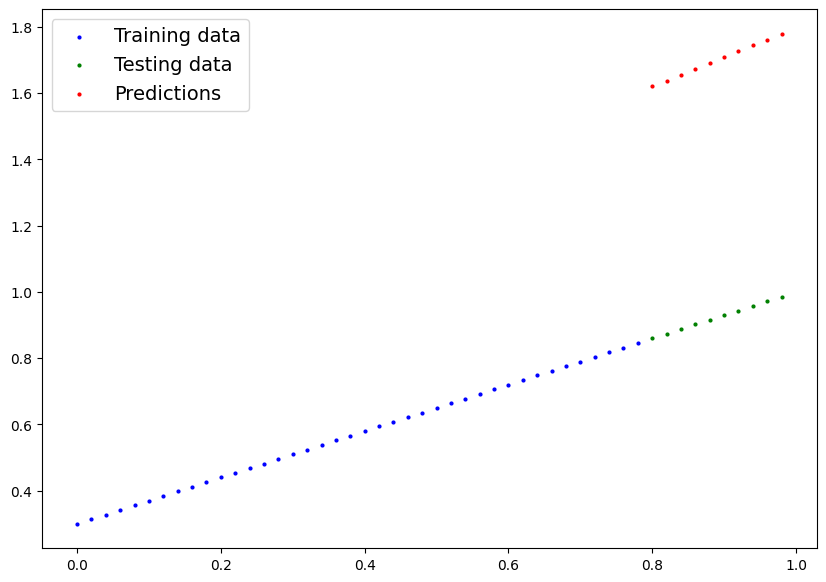

In [10]:
plot_predictions(predictions=y_preds)

## Setup a loss funtion and optimizer


In [11]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)


### Building a training loop (and a testing loop) in PyTorch

Needed:

0. Loop through the data
1. Forward pass (this involves data moving through out model's forwards
   also called forward propagation
2. Calculate the loss (compare forward pass predictions to ground truth
   labels)
3. Optimizer zero grad
4. Loss backward - move backwards through the network to calculate the
   gradients of each of the parameters of our model with respect to the loss
5. Optimizer step -use the optimizer to adjust our model's parameters to try
   and improve the loss (**gradient descent**)
   

In [12]:
# An epock is one loop through the data...
torch_manual_seed = 42
epochs = 100

# Track different values
epoch_count = []
loss_values = []
test_loss_values = []

# 0. Loop through the data
for epoch in range(epochs):
# Set the model to taining mode
  model_0.train()

  # 1. Forward pass
  y_pred = model_0(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)
  print(f"Loss:{loss}")

  # 3. Optiimizer zero grad
  optimizer.zero_grad()

  # 4. Perform backpropagation on the loss with respect to the parameters of the model
  loss.backward()

  # 5. Step the optimizer (performs gradient descent)
  optimizer.step()

### Testing
  model_0.eval() # turns off different settings in the model not needed for evaluation/test
  with torch.inference_mode():
    test_pred = model_0(X_test)
    test_loss = loss_fn(test_pred, y_test)
    if epoch % 10 == 0:
      epoch_count.append(epoch)
      loss_values.append(loss)
      test_loss_values.append(test_loss)
      print(f"Epoch: {epoch} | Test: {loss} | Test loss: {test_loss}")


model_0.state_dict()
#test_pred, test_loss

Loss:0.6860889196395874
Epoch: 0 | Test: 0.6860889196395874 | Test loss: 0.7637526988983154
Loss:0.6745679974555969
Loss:0.6630470156669617
Loss:0.6515260338783264
Loss:0.6400049924850464
Loss:0.6284840703010559
Loss:0.6169630289077759
Loss:0.6054420471191406
Loss:0.5939210653305054
Loss:0.5824000239372253
Loss:0.5708791017532349
Epoch: 10 | Test: 0.5708791017532349 | Test loss: 0.6290428042411804
Loss:0.5593580603599548
Loss:0.5478371381759644
Loss:0.5363161563873291
Loss:0.5247951149940491
Loss:0.5132741332054138
Loss:0.5017532110214233
Loss:0.4902321696281433
Loss:0.47871121764183044
Loss:0.4671902060508728
Loss:0.45566922426223755
Epoch: 20 | Test: 0.45566922426223755 | Test loss: 0.4943329691886902
Loss:0.4441482126712799
Loss:0.43262726068496704
Loss:0.4211062490940094
Loss:0.40958523750305176
Loss:0.3980643153190613
Loss:0.38654330372810364
Loss:0.375022292137146
Loss:0.36350134015083313
Loss:0.3519803285598755
Loss:0.34045934677124023
Epoch: 30 | Test: 0.34045934677124023 | Tes

OrderedDict([('weights', tensor([0.6977])), ('bias', tensor([0.3080]))])

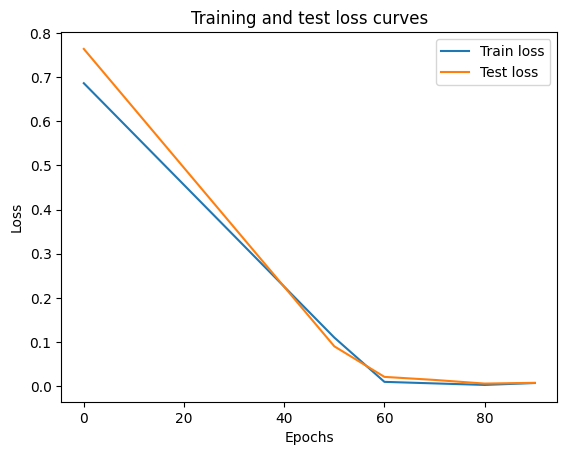

In [13]:
# Plot the loss curve
plt.plot(epoch_count, np.array(torch.tensor(loss_values).cpu().numpy()), label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

In [14]:
with torch.inference_mode():
    test_pred = model_0(X_test)
    test_loss = loss_fn(test_pred, y_test)

In [15]:
model_0.state_dict()
#test_pred, test_loss

OrderedDict([('weights', tensor([0.6977])), ('bias', tensor([0.3080]))])

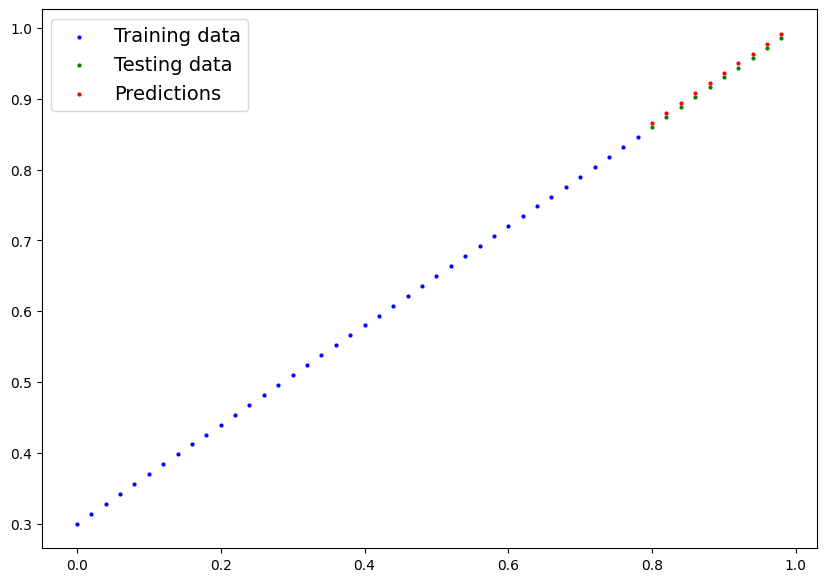

In [16]:
plot_predictions(predictions=test_pred)

In [17]:
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "01_pytorch_workflow_model.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model.pth


In [18]:
loaded_model_0 = LinearRegressionMode()
loaded_model_0.load_state_dict(torch.load(MODEL_SAVE_PATH))

<ipython-input-18-6bdba2791ef9>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_0.load_state_dict(torch.load(MODEL_SAVE_PATH))


<All keys matched successfully>

In [19]:
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds


tensor([[0.8661],
        [0.8801],
        [0.8940],
        [0.9080],
        [0.9220],
        [0.9359],
        [0.9499],
        [0.9638],
        [0.9778],
        [0.9917]])

In [20]:
model_0.eval()
with torch.inference_mode():
  model_preds = model_0(X_test)

model_preds

tensor([[0.8661],
        [0.8801],
        [0.8940],
        [0.9080],
        [0.9220],
        [0.9359],
        [0.9499],
        [0.9638],
        [0.9778],
        [0.9917]])